In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
tqdm.pandas()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats.stats import pearsonr 


In [3]:
train_df=pd.read_csv('./Data/train.csv')

In [4]:
train_df.head()

,id,y,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,1,113.0,19,A,A,-0.140642,-0.388162,-0.574181,-0.583770,-0.376220,...,0.584130,-0.100278,-0.846640,-1.461938,-1.801008,-1.804553,-1.500023,-0.980571,-0.377526,0.168243
1,2,119.0,14,C,A,0.023754,-0.105455,-0.245025,-0.310670,-0.249384,...,-3.024336,-2.480266,-1.118005,0.181451,0.726820,0.401501,-0.356744,-0.913405,-0.854943,-0.193468
2,3,109.0,13,A,A,0.180818,0.135004,0.001879,-0.134548,-0.185928,...,-0.156851,-0.262902,-0.668436,-1.172372,-1.387328,-1.016077,-0.103130,0.935900,1.550512,1.405350
3,4,110.0,18,A,A,-0.234780,-0.094543,0.193084,0.508519,0.668783,...,-1.358540,-0.028478,0.535346,-0.116384,-1.542395,-2.486781,-1.631185,1.481241,6.015514,10.233163
4,5,123.0,32,A,A,-0.130934,-0.360313,-0.547045,-0.603495,-0.508025,...,-0.825535,-0.392556,0.156361,0.567142,0.756362,0.809336,0.844580,0.876423,0.801686,0.524566


In [28]:
train_df[train_df['y']==100]

,id,y,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
12,13,100.0,21,A,A,0.124419,-0.032010,-0.163048,-0.229382,-0.240151,...,1.003227,1.250341,1.702322,2.035567,1.915570,1.285189,0.433016,-0.200682,-0.317398,0.072576
28,34,100.0,21,A,C,0.115065,0.101137,0.074821,0.030425,-0.038158,...,0.139187,0.143840,-0.086855,-0.439159,-0.714117,-0.757148,-0.548288,-0.206343,0.080069,0.144511
40,48,100.0,17,A,C,0.022479,0.256213,0.465878,0.504451,0.286841,...,-0.965176,-0.506124,0.209764,1.046412,1.756367,2.040547,1.695298,0.766354,-0.409960,-1.344700
43,52,100.0,15,C,C,-0.023276,-0.195995,-0.311649,-0.323039,-0.242717,...,-0.221673,0.275622,0.218207,-0.330875,-0.924717,-1.067618,-0.584479,0.226722,0.768463,0.536608
64,88,100.0,15,A,C,1.096983,-2.115259,-5.090382,-5.179050,-1.720322,...,17.018944,12.917166,15.140665,20.089666,17.720457,4.288623,-11.810506,-18.258877,-11.766512,-1.011262
69,96,100.0,14,A,A,3.409460,4.971033,3.714782,0.286575,-2.878236,...,-5.309491,-14.874697,-15.505020,-7.445506,1.783753,5.043738,2.183730,-0.645348,1.944086,8.387974
72,100,100.0,16,A,A,-3.202108,-4.036236,-1.983144,1.376994,3.581494,...,12.147596,6.219250,-0.341131,-2.715621,-0.939410,0.765364,-1.086358,-5.342284,-7.580034,-5.295020
121,172,100.0,17,A,C,-0.356160,-0.612644,-0.175026,0.923642,2.219596,...,-3.818442,6.657434,13.913865,11.425905,2.044530,-5.044302,-4.298348,1.248278,5.167187,5.212446
176,245,100.0,19,A,C,-0.426139,-0.587009,-0.290303,0.193842,0.360007,...,-0.940806,-3.897985,-5.170696,-3.073914,1.040760,3.722597,2.698064,-0.868383,-3.600314,-3.394384
198,275,100.0,25,A,A,0.042309,0.350105,0.666938,0.692580,0.269116,...,5.974799,4.194940,0.884115,0.867618,5.236758,9.849600,9.849508,5.047428,-0.048498,-1.442570


In [12]:
roi1=train_df[train_df['y']==100].iloc[:,5:121]
roi2=train_df[train_df['y']==100].iloc[:,121:237]

In [24]:
np.corrcoef(roi1.values.flatten(),roi2.values.flatten(),rowvar=False)

array([[1.        , 0.18465645],
       [0.18465645, 1.        ]])

In [27]:
pearsonr(roi1.values.flatten(),roi2.values.flatten())[0]

0.18465645250502175

In [5]:
columns=[f'ROI{i}-ROI{j}'  for i in range(1,116) for j in range (i+1,117) ]

In [6]:
def get_corr(row,test=False):
    if test:
        brain = np.array(row[4:])
    else:
        brain = np.array(row[5:])
    brain = brain.reshape((116, 115)).astype(float)
    corr = np.corrcoef(brain)
    flat = corr[np.triu_indices(corr.shape[0], 1)]
    return flat.tolist()


In [7]:
corr=train_df.progress_apply(lambda x :get_corr(x),axis=1)

  0%|          | 1/600 [00:01<11:29,  1.15s/it]C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 600/600 [00:13<00:00, 43.42it/s]


In [14]:
corr_df=pd.DataFrame(np.array(corr.values.tolist()),columns=columns).fillna(0)
new_train=corr_df
new_train['var1']=train_df['var1']
new_train['y']=train_df['y']

In [9]:
first_cols = train_df.iloc[:, [1,2,3,4]]

In [10]:
new_train = first_cols.join(corr_df)

In [10]:
new_train['var2'].replace({'A':0, 'C':1}, inplace = True)
new_train['var3'].replace({'A':0, 'C':1}, inplace = True)

In [15]:
new_train

,Roi1-Roi2,Roi1-Roi3,Roi1-Roi4,Roi1-Roi5,Roi1-Roi6,Roi1-Roi7,Roi1-Roi8,Roi1-Roi9,Roi1-Roi10,Roi1-Roi11,...,Roi112-Roi115,Roi112-Roi116,Roi113-Roi114,Roi113-Roi115,Roi113-Roi116,Roi114-Roi115,Roi114-Roi116,Roi115-Roi116,var1,y
0,0.320408,-0.156421,-0.115766,-0.306091,0.034975,-0.147885,-0.228411,-0.237148,0.020136,0.445899,...,-0.072048,0.411215,0.322524,0.208173,-0.071341,0.282784,-0.055727,0.144371,19,113.0
1,0.386406,0.084164,-0.226632,-0.136301,-0.428097,-0.126119,-0.057845,-0.122750,-0.262477,0.594780,...,-0.159465,0.264405,0.006974,0.009238,0.266661,0.047870,0.112745,0.142081,14,119.0
2,0.809958,0.096828,-0.012295,-0.658145,-0.565232,0.436640,0.163701,-0.528475,-0.458596,0.313225,...,-0.085829,0.266476,0.340162,-0.142864,0.342046,0.374683,0.281569,-0.166943,13,109.0
3,0.371073,0.340416,0.165785,0.319523,0.071653,-0.006067,0.102873,0.247239,0.153692,0.145438,...,-0.101063,0.494471,0.630120,0.089310,0.583527,0.391849,0.529610,0.202928,18,110.0
4,0.238808,-0.075542,-0.312048,0.343195,-0.017375,0.279959,-0.206112,0.266237,-0.035437,0.385538,...,0.242850,0.180382,0.264813,0.369938,0.449401,-0.011589,0.637432,0.323892,32,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.239704,0.334075,-0.133219,0.396904,0.218766,0.401353,-0.211222,0.330301,0.118898,0.499315,...,0.411275,0.662582,0.576929,0.390116,0.636213,0.414633,0.584703,0.823124,41,110.0
596,0.082087,0.106322,-0.234501,-0.227719,-0.221337,0.428577,-0.541010,0.058470,-0.258668,0.710444,...,0.101323,0.343547,0.358325,0.412704,0.412598,0.035520,-0.126774,0.412996,64,120.0
597,0.550363,-0.173623,-0.087052,-0.076264,-0.334513,0.005763,-0.164106,-0.227619,-0.378778,0.688334,...,0.328117,0.451602,0.389896,0.261399,0.427783,0.504431,0.574561,0.499287,27,96.0
598,0.302419,0.042842,-0.557081,-0.029869,-0.165823,0.216248,-0.262268,0.092553,-0.006392,0.256167,...,-0.134313,0.081805,0.124225,-0.034212,-0.042134,0.136920,0.025787,-0.288578,29,118.0


In [77]:
new_train.groupby('y').size().sort_values(ascending=False)

y
100.0    24
113.0    20
109.0    19
119.0    18
108.0    17
         ..
112.5     1
114.5     1
115.5     1
121.5     1
148.0     1
Length: 99, dtype: int64

In [83]:
new_train=new_train.groupby('y').mean().reset_index()

In [100]:
new_train

,y,Roi1-Roi2,Roi1-Roi3,Roi1-Roi4,Roi1-Roi5,Roi1-Roi6,Roi1-Roi7,Roi1-Roi8,Roi1-Roi9,Roi1-Roi10,...,Roi112-Roi114,Roi112-Roi115,Roi112-Roi116,Roi113-Roi114,Roi113-Roi115,Roi113-Roi116,Roi114-Roi115,Roi114-Roi116,Roi115-Roi116,var1
0,41.0,0.351776,0.090320,-0.305664,-0.005851,-0.375326,0.234046,-0.392289,-0.073801,-0.441405,...,0.125899,0.356821,0.463306,0.429428,0.578428,0.541542,0.269060,0.408063,0.503399,16.0
1,65.0,0.111951,-0.126279,-0.334451,-0.097180,-0.312959,0.108186,-0.431762,0.021831,-0.345076,...,0.089658,-0.024179,-0.242846,0.271416,0.073239,-0.414840,0.315913,0.060164,0.253529,38.0
2,72.0,0.455979,-0.302877,-0.178960,-0.126947,-0.153894,0.184298,-0.065978,-0.397872,-0.139816,...,0.577743,0.159927,0.204075,0.736824,0.270574,0.343185,0.609286,0.404955,0.418586,22.0
3,73.0,0.464130,-0.177949,-0.228984,0.056070,0.113570,-0.180182,-0.225753,-0.118901,-0.178698,...,0.418399,0.034812,0.043066,0.082793,-0.193372,-0.090236,0.336810,0.216084,0.011768,15.0
4,75.0,0.648708,0.041617,0.422122,0.218517,-0.010028,0.198131,0.160266,-0.095230,-0.382416,...,0.480733,-0.041561,-0.119244,0.243030,0.092524,0.197212,0.302225,0.111809,-0.008902,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,141.0,0.450514,-0.176912,-0.289311,0.363313,0.028418,-0.204318,-0.333116,0.181487,0.007915,...,0.130304,-0.150247,-0.102222,0.030636,-0.053812,-0.117922,0.477598,0.278899,0.499614,15.0
95,142.0,0.045429,-0.047345,-0.230363,0.001688,-0.100862,-0.056084,-0.165958,-0.191436,-0.151489,...,0.135471,0.063377,0.174490,0.281196,0.383178,0.076434,0.463511,0.146633,0.341687,9.0
96,144.0,0.614106,0.012456,0.162522,0.084736,0.017662,0.028986,0.194729,-0.152006,0.079159,...,0.076337,-0.089087,0.257749,0.160127,-0.181966,0.275674,0.311404,0.187823,0.307101,10.0
97,147.5,0.584411,-0.183500,-0.094689,-0.250299,-0.145261,-0.207451,-0.075183,-0.213550,-0.001117,...,0.432392,-0.038554,0.075890,0.380084,-0.211538,-0.136067,0.389767,0.278863,0.577098,9.0


# Train

## Linear Regession

In [81]:
reg = LinearRegression()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(new_train.drop(columns='y'), new_train['y'], test_size=0.25, random_state=42)

In [85]:
reg.fit(X_train,y_train)

LinearRegression()

In [86]:
y_pred=reg.predict(X_test)

In [87]:
mean_squared_error(y_test, y_pred,squared=False)

23.48676192921079

## SVR

In [88]:
params = [{'kernel' : ['poly'],
        'C' : [1,5,10],
        'degree' : [2,3,4],
        #'coef0' : [0.01,10,0.5],
        #'gamma' : ('auto','scale')}]


In [58]:
svr_reg=SVR()
grids = GridSearchCV(svr_reg,params,cv=3,verbose=5,n_jobs=-1)
grids.fit(X_train,y_train)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [2, 3, 4], 'gamma': ('auto', 'scale'),
                          'kernel': ['poly']}],
             verbose=5)

In [59]:
grids.best_params_

{'C': 1, 'coef0': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [60]:
y_pred=grids.predict(X_test)

In [61]:
mean_squared_error(y_test, y_pred,squared=False)

15.254641757582586

In [97]:
#retrain on all dataset
svr_reg.fit(new_train.drop(columns='y'),new_train['y'])

SVR()

In [98]:
y_pred=svr_reg.predict(X_test)

In [99]:
mean_squared_error(y_test, y_pred,squared=False)

23.125987548671535

## K-neigbors regression

In [89]:
from sklearn.neighbors import KNeighborsRegressor

In [90]:
for k in range(30,45):
    neigh = KNeighborsRegressor(n_neighbors=k,weights='uniform').fit(X_train, y_train)
    y_pred=neigh.predict(X_test)
    print(k,mean_squared_error(y_test, y_pred,squared=False))

30 23.913804706812247
31 23.921643898909263
32 23.689494061846275
33 23.394530334819223
34 23.347601626935983
35 23.426917711670644
36 23.382443358370555
37 23.150406521980205
38 23.130047102143315
39 23.284600278401125
40 23.435207354533905
41 23.553810454203628
42 23.516564095294033
43 23.441367658164385
44 23.279696000329743


In [91]:
neigh = KNeighborsRegressor(n_neighbors=33,weights='distance',p=2).fit(X_train, y_train)

In [92]:
y_pred=neigh.predict(X_test)

In [93]:
mean_squared_error(y_test, y_pred,squared=False)

23.426081939166934

In [94]:
neigh = KNeighborsRegressor(n_neighbors=33,weights='distance',p=2).fit(new_train.drop(columns='y'),new_train['y'])

In [95]:
y_pred=neigh.predict(X_test)

In [96]:
mean_squared_error(y_test, y_pred,squared=False)

2.2936900216481114e-05

# Test 

In [23]:
test_df=pd.read_csv('./Data/test.csv')

In [24]:
test_df

,id,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,17,32,A,A,-0.350440,-0.222368,0.023356,0.243820,0.307884,0.181462,...,-0.249206,-0.299956,-0.230605,-0.002176,0.307232,0.574038,0.719488,0.739103,0.657216,0.466077
1,19,11,C,A,-0.637826,-0.626851,-0.360784,0.030366,0.336757,0.405507,...,0.747080,1.451542,1.888522,1.843617,1.353949,0.721757,0.341038,0.461075,1.052172,1.853388
2,25,17,A,C,-0.012941,-0.104797,-0.236863,-0.323248,-0.289526,-0.127867,...,-2.263840,-2.082246,-1.299818,-0.087112,1.200546,2.217524,2.777598,2.863644,2.528300,1.804936
3,32,17,A,C,0.090513,0.210141,0.258353,0.176808,-0.021250,-0.246477,...,-2.662342,-1.246634,0.756969,2.115026,2.007031,0.606600,-1.034530,-1.731524,-1.012911,0.541681
4,33,16,A,C,0.020757,0.004422,0.048168,0.217449,0.499191,0.774152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,777,20,A,C,0.196767,0.279578,0.269504,0.142366,-0.050581,-0.192273,...,1.501500,0.315651,-0.438466,-0.390447,0.203565,1.092143,1.984272,2.303799,1.587597,0.184648
195,783,24,A,C,0.166928,0.062544,-0.064816,-0.223924,-0.397589,-0.477872,...,0.998999,2.150780,1.765160,0.167519,-1.398137,-2.035133,-1.780128,-1.156148,-0.511489,0.100604
196,784,24,A,C,0.467909,0.601598,0.466428,0.064870,-0.453154,-0.874220,...,4.963199,1.800244,-2.997877,-5.256964,-2.305884,3.395893,5.967640,2.081252,-5.207866,-9.263192
197,792,29,C,C,0.158687,0.187958,0.187666,0.168700,0.137513,0.109296,...,-2.660509,-1.084989,0.932748,2.014907,1.678764,0.401733,-0.877058,-1.297012,-0.560106,0.733061


In [25]:
corr_test=test_df.progress_apply(lambda row:get_corr(row,test=True),axis=1)

  1%|          | 1/199 [00:00<01:32,  2.15it/s]C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 199/199 [00:03<00:00, 50.59it/s]


In [26]:
test_final_df=pd.DataFrame(np.array(corr_test.values.tolist()),columns=columns).fillna(0)

In [27]:
test_final_df

,Roi1-Roi2,Roi1-Roi3,Roi1-Roi4,Roi1-Roi5,Roi1-Roi6,Roi1-Roi7,Roi1-Roi8,Roi1-Roi9,Roi1-Roi10,Roi1-Roi11,...,Roi112-Roi113,Roi112-Roi114,Roi112-Roi115,Roi112-Roi116,Roi113-Roi114,Roi113-Roi115,Roi113-Roi116,Roi114-Roi115,Roi114-Roi116,Roi115-Roi116
0,0.574820,-0.184674,0.335784,-0.433897,-0.314960,0.121238,-0.304749,-0.360175,-0.213842,0.592588,...,0.188771,0.237508,0.273457,0.225723,-0.060189,0.135940,-0.068397,0.239504,0.221618,-0.186755
1,0.459187,0.091974,-0.012738,0.018270,-0.144327,0.286588,-0.024430,0.003806,-0.102631,-0.192910,...,0.395746,-0.245494,0.173441,0.203784,-0.069734,0.214056,0.230202,0.037493,0.031108,0.125471
2,0.318010,0.118248,-0.275287,0.067088,0.031507,-0.158764,-0.122662,0.233291,0.070906,0.441458,...,0.656703,0.428289,0.123900,0.090384,0.504827,0.382075,0.136943,0.402817,0.237602,0.293227
3,0.405577,-0.424435,-0.260486,-0.053301,0.118364,-0.187334,-0.161422,-0.307382,-0.090365,0.439814,...,0.560449,0.255396,-0.304971,-0.070677,0.186580,-0.116094,0.077223,0.041814,-0.004182,0.266954
4,0.531680,0.145877,-0.131794,0.361544,0.015393,0.055204,-0.210112,0.204085,0.027663,0.721721,...,0.003357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.217994,0.204179,-0.118850,0.250223,0.456717,-0.195145,-0.325952,-0.053743,-0.012564,0.794479,...,0.218118,0.021160,0.018531,0.039184,-0.006917,-0.157338,-0.094451,0.751545,0.652086,0.765714
195,0.465376,0.038288,-0.065834,-0.123540,-0.223827,0.372467,-0.039882,-0.101934,-0.115844,0.628183,...,0.453787,0.121769,0.407962,0.322393,0.502507,0.234785,0.260871,0.272752,0.113825,0.565614
196,0.320433,-0.058686,-0.264435,-0.292921,-0.012648,-0.363793,-0.426708,0.040388,-0.286963,0.561433,...,0.072454,-0.090642,0.058275,0.047026,0.451872,0.040126,0.278858,0.593402,0.321660,0.652692
197,0.550265,-0.386250,-0.283560,0.059427,0.095853,-0.092002,0.283123,0.147292,-0.060154,0.400976,...,0.114647,0.535039,0.289765,0.529971,0.317849,0.188834,-0.064073,0.547437,0.426339,0.495522


In [28]:
test_df

,id,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,17,32,A,A,-0.350440,-0.222368,0.023356,0.243820,0.307884,0.181462,...,-0.249206,-0.299956,-0.230605,-0.002176,0.307232,0.574038,0.719488,0.739103,0.657216,0.466077
1,19,11,C,A,-0.637826,-0.626851,-0.360784,0.030366,0.336757,0.405507,...,0.747080,1.451542,1.888522,1.843617,1.353949,0.721757,0.341038,0.461075,1.052172,1.853388
2,25,17,A,C,-0.012941,-0.104797,-0.236863,-0.323248,-0.289526,-0.127867,...,-2.263840,-2.082246,-1.299818,-0.087112,1.200546,2.217524,2.777598,2.863644,2.528300,1.804936
3,32,17,A,C,0.090513,0.210141,0.258353,0.176808,-0.021250,-0.246477,...,-2.662342,-1.246634,0.756969,2.115026,2.007031,0.606600,-1.034530,-1.731524,-1.012911,0.541681
4,33,16,A,C,0.020757,0.004422,0.048168,0.217449,0.499191,0.774152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,777,20,A,C,0.196767,0.279578,0.269504,0.142366,-0.050581,-0.192273,...,1.501500,0.315651,-0.438466,-0.390447,0.203565,1.092143,1.984272,2.303799,1.587597,0.184648
195,783,24,A,C,0.166928,0.062544,-0.064816,-0.223924,-0.397589,-0.477872,...,0.998999,2.150780,1.765160,0.167519,-1.398137,-2.035133,-1.780128,-1.156148,-0.511489,0.100604
196,784,24,A,C,0.467909,0.601598,0.466428,0.064870,-0.453154,-0.874220,...,4.963199,1.800244,-2.997877,-5.256964,-2.305884,3.395893,5.967640,2.081252,-5.207866,-9.263192
197,792,29,C,C,0.158687,0.187958,0.187666,0.168700,0.137513,0.109296,...,-2.660509,-1.084989,0.932748,2.014907,1.678764,0.401733,-0.877058,-1.297012,-0.560106,0.733061


In [29]:
first_cols_test = test_df.iloc[:, [1,2,3]]
new_test = first_cols_test.join(test_final_df)
new_test['var2'].replace({'A':0, 'C':1}, inplace = True)
new_test['var3'].replace({'A':0, 'C':1}, inplace = True)

In [30]:
new_test

,var1,var2,var3,Roi1-Roi2,Roi1-Roi3,Roi1-Roi4,Roi1-Roi5,Roi1-Roi6,Roi1-Roi7,Roi1-Roi8,...,Roi112-Roi113,Roi112-Roi114,Roi112-Roi115,Roi112-Roi116,Roi113-Roi114,Roi113-Roi115,Roi113-Roi116,Roi114-Roi115,Roi114-Roi116,Roi115-Roi116
0,32,0,0,0.574820,-0.184674,0.335784,-0.433897,-0.314960,0.121238,-0.304749,...,0.188771,0.237508,0.273457,0.225723,-0.060189,0.135940,-0.068397,0.239504,0.221618,-0.186755
1,11,1,0,0.459187,0.091974,-0.012738,0.018270,-0.144327,0.286588,-0.024430,...,0.395746,-0.245494,0.173441,0.203784,-0.069734,0.214056,0.230202,0.037493,0.031108,0.125471
2,17,0,1,0.318010,0.118248,-0.275287,0.067088,0.031507,-0.158764,-0.122662,...,0.656703,0.428289,0.123900,0.090384,0.504827,0.382075,0.136943,0.402817,0.237602,0.293227
3,17,0,1,0.405577,-0.424435,-0.260486,-0.053301,0.118364,-0.187334,-0.161422,...,0.560449,0.255396,-0.304971,-0.070677,0.186580,-0.116094,0.077223,0.041814,-0.004182,0.266954
4,16,0,1,0.531680,0.145877,-0.131794,0.361544,0.015393,0.055204,-0.210112,...,0.003357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,20,0,1,0.217994,0.204179,-0.118850,0.250223,0.456717,-0.195145,-0.325952,...,0.218118,0.021160,0.018531,0.039184,-0.006917,-0.157338,-0.094451,0.751545,0.652086,0.765714
195,24,0,1,0.465376,0.038288,-0.065834,-0.123540,-0.223827,0.372467,-0.039882,...,0.453787,0.121769,0.407962,0.322393,0.502507,0.234785,0.260871,0.272752,0.113825,0.565614
196,24,0,1,0.320433,-0.058686,-0.264435,-0.292921,-0.012648,-0.363793,-0.426708,...,0.072454,-0.090642,0.058275,0.047026,0.451872,0.040126,0.278858,0.593402,0.321660,0.652692
197,29,1,1,0.550265,-0.386250,-0.283560,0.059427,0.095853,-0.092002,0.283123,...,0.114647,0.535039,0.289765,0.529971,0.317849,0.188834,-0.064073,0.547437,0.426339,0.495522


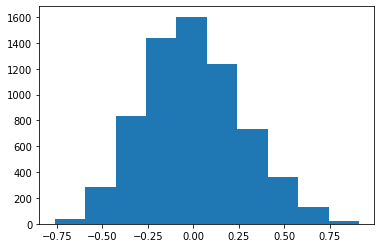

In [73]:
plt.hist(new_test.iloc[0,3:]);

In [41]:
y_pred_test=neigh.predict(new_test)

Error: Pip module Unable to parse debugpy output, please log an issue with https://github.com/microsoft/vscode-jupyter is required for debugging cells. You will need to install it to debug cells.

In [42]:
y_pred_test

array([110.15871793, 107.92029249, 108.15948288, 104.92357592,
       106.75282968, 106.76239961, 108.49816084, 109.41019949,
       107.81340435, 105.46077361, 108.39965923, 109.51239217,
       112.3574079 , 112.26729194, 103.05177377, 106.19391887,
       105.89712502, 110.218238  , 104.76232036, 107.97421839,
       106.57962843, 105.52157434, 108.73439531, 107.83580966,
       106.91656632, 107.48288954, 104.91880624, 105.58571851,
       112.90954013, 107.06711356, 105.01693136, 108.54137057,
       106.35663678, 108.87159282, 106.65465661, 107.16594031,
       105.24882017, 108.85301776, 106.09994865, 105.86291335,
       108.93220904, 106.7281341 , 107.21465785, 104.25820614,
       104.92624649, 107.18285376, 109.38361266, 106.15385654,
       106.28374121, 104.12188381, 109.69995521, 106.74931228,
       108.46046364, 106.798098  , 106.27441703, 105.91935443,
       107.94584888, 106.64728667, 108.40478204, 107.77178281,
       106.05458592, 105.41623504, 109.02982042, 106.79

In [43]:
df_leaderboard=pd.DataFrame({'id':test_df['id'],'target':y_pred_test})

In [35]:
df_leaderboard

,id,target
0,17,108.678207
1,19,110.297267
2,25,106.852678
3,32,104.476653
4,33,103.486928
...,...,...
194,777,111.228740
195,783,112.062054
196,784,109.588514
197,792,111.006566


In [44]:
df_leaderboard

,id,target
0,17,110.158718
1,19,107.920292
2,25,108.159483
3,32,104.923576
4,33,106.752830
...,...,...
194,777,113.772811
195,783,112.309465
196,784,113.409241
197,792,114.279185


In [45]:
df_leaderboard.to_csv('G14_04',index=False)